# Graduate Data in Hong Kong 


## Description
This project aims to analyze employment data of graduates from various Hong Kong universities to identify trends across industries and occupations. We seek to determine if certain universities excel in placing graduates in specific sectors and which fields have the highest demand for graduates. 
<br>
<br>Through data cleaning, organization, visualization, and hypothesis testing, the project will provide insights into employment patterns.

## Importing Libraries

In [30]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

## Reading the csv


In [31]:
df=pd.read_csv(r'C:\Users\Admin\Documents\my_projects\Graduate_Employment_Situation(Eng).csv')
df.head()

,Academic Year,University,Level of study,Employment Situation,Occupation,Number of Graduates (Headcount)
0,2009/10,City University of Hong Kong,Research postgraduate,FT employment,"Authors, Journalists and Related Writers",1
1,2009/10,City University of Hong Kong,Research postgraduate,FT employment,Business Professionals,2
2,2009/10,City University of Hong Kong,Research postgraduate,FT employment,"Economists, Statisticians and Mathematicians",2
3,2009/10,City University of Hong Kong,Research postgraduate,FT employment,Engineering Technicians,1
4,2009/10,City University of Hong Kong,Research postgraduate,FT employment,Engineers,3


## Data Cleaning

In [32]:
#Checking for any missing values
df.isnull().sum()


Academic Year                      0
University                         0
Level of study                     0
Employment Situation               0
Occupation                         0
Number of Graduates (Headcount)    0
dtype: int64

In [33]:
#Checking for any duplicate values
df.duplicated().sum()   

0

In [34]:
#Viewing the data types of the columns
df.dtypes

Academic Year                      object
University                         object
Level of study                     object
Employment Situation               object
Occupation                         object
Number of Graduates (Headcount)     int64
dtype: object

In [35]:
#Changing the data types of the columns
df['Academic Year'] = df['Academic Year'].astype(str)
df['University'] = df['University'].astype('category')
df['Level of study'] = df['Level of study'].astype('category')
df['Employment Situation'] = df['Employment Situation'].astype('category')
df['Occupation'] = df['Occupation'].astype('category')
df.rename(columns={'Number of Graduates (Headcount)':'Number of Graduates'}, inplace=True)
df['Number of Graduates'] = df['Number of Graduates'].astype(int)


df.dtypes

Academic Year             object
University              category
Level of study          category
Employment Situation    category
Occupation              category
Number of Graduates        int32
dtype: object

In [36]:
#Standardizing the column names
df.columns = df.columns.str.strip()

df['Year'] = df['Academic Year'].str[:4].astype(int)
df = df.drop(columns = ['Academic Year'])

df.columns = df.columns.str.upper()
for col in df.columns:
    if df[col].dtype == 'category':
        df[col] = df[col].str.strip().str.lower()

df.head()

,UNIVERSITY,LEVEL OF STUDY,EMPLOYMENT SITUATION,OCCUPATION,NUMBER OF GRADUATES,YEAR
0,city university of hong kong,research postgraduate,ft employment,"authors, journalists and related writers",1,2009
1,city university of hong kong,research postgraduate,ft employment,business professionals,2,2009
2,city university of hong kong,research postgraduate,ft employment,"economists, statisticians and mathematicians",2,2009
3,city university of hong kong,research postgraduate,ft employment,engineering technicians,1,2009
4,city university of hong kong,research postgraduate,ft employment,engineers,3,2009


In [37]:
#Viewing the year range in the dataset
print(df['YEAR'].unique())

[2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021]


In [38]:
#Ordering the columns
col_list = list(df.columns)
print(col_list)

df = df[['YEAR', 'UNIVERSITY', 'LEVEL OF STUDY', 'EMPLOYMENT SITUATION', 'OCCUPATION', 'NUMBER OF GRADUATES']]

#Assigning abbreviations for the universities
university_abbreviations = {
    'city university of hong kong': 'CityU',
    'hong kong baptist university': 'HKBU',
    'lingnan university': 'LingnanU',
    'the chinese university of hong kong': 'CUHK',
    'the education university of hong kong': 'EdUHK',
    'the hong kong polytechnic university': 'PolyU',
    'the hong kong university of science and technology': 'HKUST',
    'the university of hong kong': 'HKU'
}

df.replace({'UNIVERSITY': university_abbreviations}, inplace=True)
df.head()


['UNIVERSITY', 'LEVEL OF STUDY', 'EMPLOYMENT SITUATION', 'OCCUPATION', 'NUMBER OF GRADUATES', 'YEAR']


,YEAR,UNIVERSITY,LEVEL OF STUDY,EMPLOYMENT SITUATION,OCCUPATION,NUMBER OF GRADUATES
0,2009,CityU,research postgraduate,ft employment,"authors, journalists and related writers",1
1,2009,CityU,research postgraduate,ft employment,business professionals,2
2,2009,CityU,research postgraduate,ft employment,"economists, statisticians and mathematicians",2
3,2009,CityU,research postgraduate,ft employment,engineering technicians,1
4,2009,CityU,research postgraduate,ft employment,engineers,3


## Data Organization & Exploration

### What is the trend of combined under-employment and unemployment rate in Hong Kong from 2009 to 2021?

Data grouping and calculation

In [39]:
#Grouping the data by year and employment situation

grouped_by_employment_situation = df.copy()
grouped_by_employment_situation = df.groupby(['YEAR', 'EMPLOYMENT SITUATION'])['NUMBER OF GRADUATES'].sum().reset_index()

grouped_by_employment_situation.head()

,YEAR,EMPLOYMENT SITUATION,NUMBER OF GRADUATES
0,2009,ft employment,14075
1,2009,further studies,2831
2,2009,others,482
3,2009,underemployed,567
4,2009,unemployed,301


In [40]:
#Combining the unemployed and underemployed categories
grouped_by_employment_situation['EMPLOYMENT SITUATION'] = grouped_by_employment_situation['EMPLOYMENT SITUATION'].replace(['unemployed', 'underemployed'], 'unemployed/underemployed')

#Regrouping the data
grouped_by_employment_situation = grouped_by_employment_situation.groupby(['YEAR', 'EMPLOYMENT SITUATION'])['NUMBER OF GRADUATES'].sum().reset_index()

#Calculating the percentage of graduates in each employment situation
grouped_by_employment_situation['PERCENTAGE'] = grouped_by_employment_situation.groupby('YEAR')['NUMBER OF GRADUATES'].transform(lambda x: (x / x.sum()) * 100)

grouped_by_employment_situation.head()

,YEAR,EMPLOYMENT SITUATION,NUMBER OF GRADUATES,PERCENTAGE
0,2009,ft employment,14075,77.097940
1,2009,further studies,2831,15.507230
2,2009,others,482,2.640228
3,2009,unemployed/underemployed,868,4.754601
4,2010,ft employment,14966,78.735269


Plotting a line-graph of the combined under & unemployment rate in Hong Kong

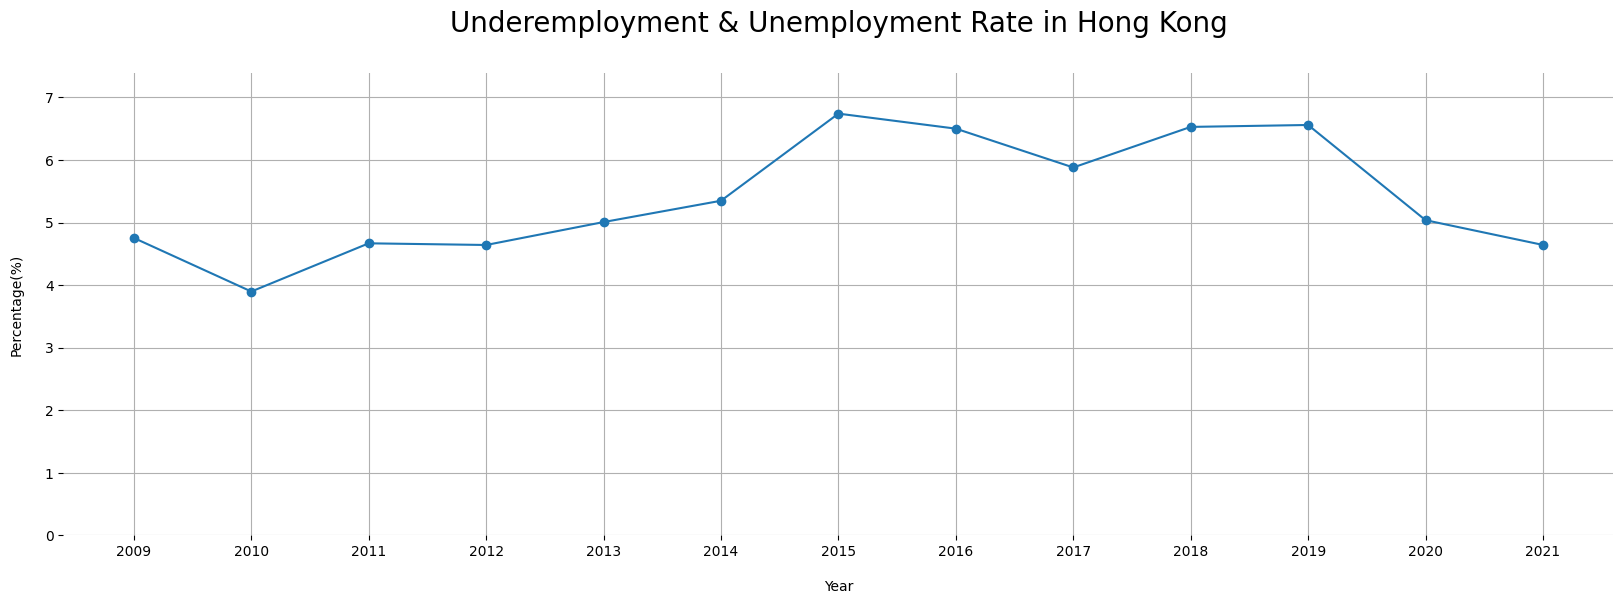

In [41]:
#Plotting a line-graph 
fig, ax = plt.subplots(figsize=(20, 6))
unemployed_underemployed = grouped_by_employment_situation[grouped_by_employment_situation['EMPLOYMENT SITUATION'] == 'unemployed/underemployed']

unemployed_underemployed_plot = unemployed_underemployed.plot(x = 'YEAR', y = 'PERCENTAGE', kind = 'line', marker = 'o', ax = ax, legend = False)
years = sorted(unemployed_underemployed['YEAR'].unique())
unemployed_underemployed_plot.set_xticks(years)


y_min, y_max = ax.get_ylim()
ax.set_ylim(ymin = 0, ymax = y_max + 0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.xlabel('Year', labelpad = 15)
plt.ylabel('Percentage(%)', labelpad = 15)
plt.title('Underemployment & Unemployment Rate in Hong Kong', pad = 30, fontsize = 20)
plt.grid(True)
plt.show()

### How does the combined under-employment and unemployment rate differ across the 8 UGC Universities in Hong Kong from 2009 to 2021? 

Data grouping and calculation

In [42]:
grouped_by_university_employment = df.copy()

#Combining the unemployed and underemployed categories
grouped_by_university_employment['EMPLOYMENT SITUATION'] = grouped_by_university_employment['EMPLOYMENT SITUATION'].replace(['unemployed', 'underemployed'], 'unemployed/underemployed')
grouped_by_university_employment = grouped_by_university_employment.groupby(['YEAR', 'UNIVERSITY', 'EMPLOYMENT SITUATION'])['NUMBER OF GRADUATES'].sum().reset_index()

grouped_by_university_employment.head()

,YEAR,UNIVERSITY,EMPLOYMENT SITUATION,NUMBER OF GRADUATES
0,2009,CUHK,ft employment,2588
1,2009,CUHK,further studies,547
2,2009,CUHK,others,101
3,2009,CUHK,unemployed/underemployed,140
4,2009,CityU,ft employment,2148


In [43]:
# Calculate total graduates per university per year
total_graduates_per_uni_year = grouped_by_university_employment.groupby(['YEAR', 'UNIVERSITY'])['NUMBER OF GRADUATES'].sum().reset_index()
total_graduates_per_uni_year = total_graduates_per_uni_year.rename(columns={'Number of Graduates': 'TOTAL GRADUATES'})

# Calculate percentage of underemployed/unemployed graduates per university per year
underemployed_unemployed_per_uni_year = grouped_by_university_employment[grouped_by_university_employment['EMPLOYMENT SITUATION'] == 'unemployed/underemployed']

combined_to_calculate_percentage = pd.merge(total_graduates_per_uni_year, underemployed_unemployed_per_uni_year, on=['YEAR', 'UNIVERSITY'])

combined_to_calculate_percentage = combined_to_calculate_percentage.rename(columns={
    'NUMBER OF GRADUATES_x': 'TOTAL GRADUATES',
    'NUMBER OF GRADUATES_y': 'UNDEREMPLOYED/UNEMPLOYED GRADUATES'
})

combined_to_calculate_percentage['PERCENTAGE'] = (combined_to_calculate_percentage['UNDEREMPLOYED/UNEMPLOYED GRADUATES'] / combined_to_calculate_percentage['TOTAL GRADUATES']) * 100

combined_to_calculate_percentage.head()


,YEAR,UNIVERSITY,TOTAL GRADUATES,EMPLOYMENT SITUATION,UNDEREMPLOYED/UNEMPLOYED GRADUATES,PERCENTAGE
0,2009,CUHK,3376,unemployed/underemployed,140,4.146919
1,2009,CityU,2667,unemployed/underemployed,116,4.349456
2,2009,EdUHK,746,unemployed/underemployed,29,3.887399
3,2009,HKBU,1557,unemployed/underemployed,81,5.202312
4,2009,HKU,3504,unemployed/underemployed,177,5.051370


Plotting a multi-line graph to show the underemployment and unemployment rate per graduating class in each university


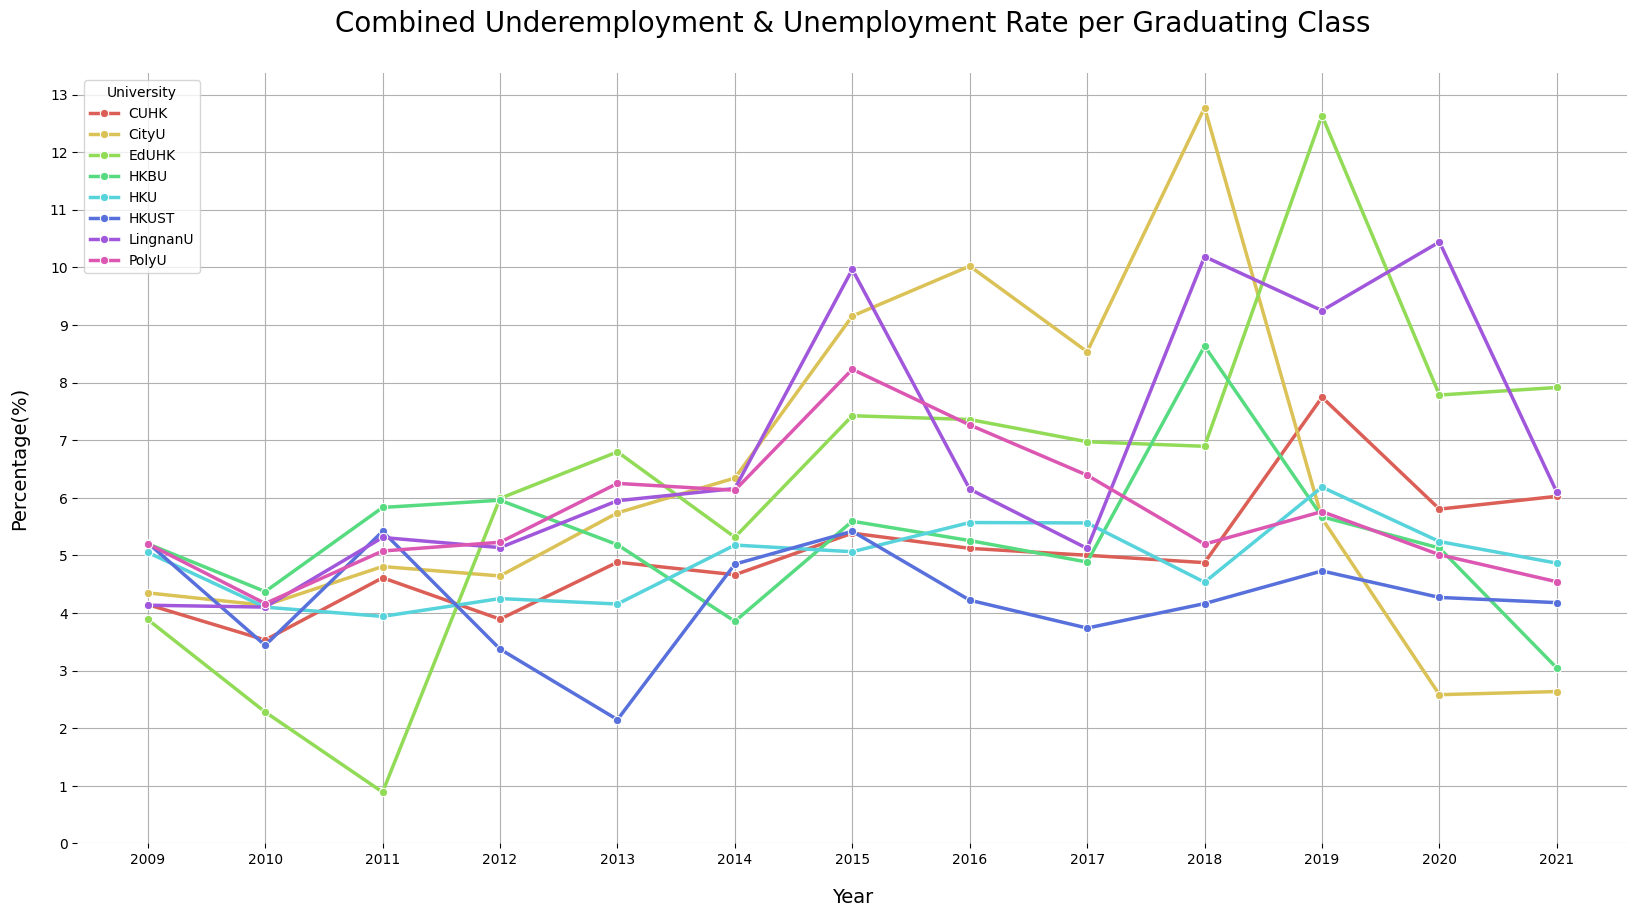

In [44]:
#Plot a multi-line graph 

plt.figure(figsize=(20, 10))
colour_palette = sns.color_palette('hls', int(len(combined_to_calculate_percentage['UNIVERSITY'].unique())))

sns.lineplot(data=combined_to_calculate_percentage, x='YEAR', y='PERCENTAGE', hue='UNIVERSITY', marker='o', palette = colour_palette, linewidth=2.5)
ax = plt.gca()
ax.set_ylim(bottom=0)
plt.yticks(np.arange(0, max(combined_to_calculate_percentage['PERCENTAGE'])+1, 1))
years = sorted(unemployed_underemployed['YEAR'].unique())
ax.set_xticks(years)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.xlabel('Year', labelpad=15, fontsize=14) 
plt.ylabel('Percentage(%)', labelpad=15, fontsize=14)  
plt.title('Combined Underemployment & Unemployment Rate per Graduating Class', pad=30, fontsize=20)
plt.legend(title='University' ,loc='upper left')
plt.grid(True)

plt.show()

Plotting a heatmap to better understand the underemployment and unemployment rate per graduating class in each university


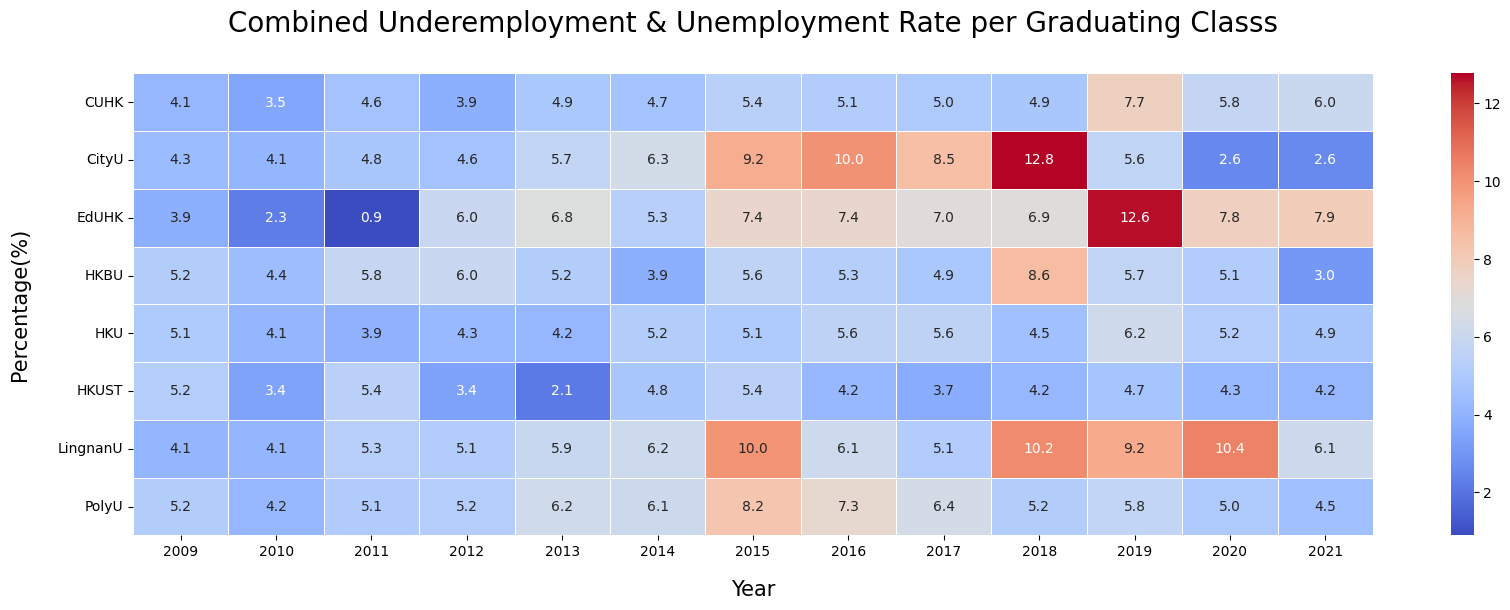

In [45]:
#Plotting a heatmap 
plt.figure(figsize=(20,6))

hm = sns.heatmap(combined_to_calculate_percentage.pivot(index = 'UNIVERSITY', columns = 'YEAR', values ='PERCENTAGE'), cmap='coolwarm', annot=True, fmt=".1f", linewidths=0.5)

plt.yticks(rotation = 0)
plt.xlabel('Year', labelpad=15, fontsize=15) 
plt.ylabel('Percentage(%)', labelpad=20, fontsize=15)  
plt.title('Combined Underemployment & Unemployment Rate per Graduating Classs', pad=30, fontsize=20)

plt.show()

### Chi-Squared Test <br>
#### To determine if there is a significant association between the university and the employment situation.

_Null Hypothesis (H0)_: There is no association between the university and the employment situation. <br>
<br>
_Alternate Hypothesis (H1)_: There is an association between the university and the employment situation.

<u>Assumptions</u>
1. Each observation is independent.
2. Both variables are categorical.
3. All expected frequencies are at least 5. 

In [46]:
##Creating a contingency table to analyze the relationship between the university and employment situation
contingency_table = pd.crosstab(df['UNIVERSITY'], df['EMPLOYMENT SITUATION'])
contingency_table

EMPLOYMENT SITUATION,ft employment,further studies,others,underemployed,unemployed
UNIVERSITY,,,,,
CUHK,663,39,36,38,37
CityU,646,51,46,42,44
EdUHK,371,42,41,40,35
HKBU,457,29,28,24,20
HKU,688,39,39,39,37
HKUST,489,26,26,26,25
LingnanU,230,26,23,26,24
PolyU,624,39,39,35,39


In [47]:
#Carrying out the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

In [48]:
#Checking the expected frequencies to be at least 5
print("Expected Frequencies:")
print(expected)

validity = True
for i in expected:
    for j in i:
        if j < 5:
            validity = False
       
if validity == True:
    print('All expected frequencies are greater than or equal to 5. The chi-square test is valid.')
else: 
    print('There is an expected frequency less than 5. The chi-square test is not valid.')

Expected Frequencies:
[[643.23917995  44.9094533   42.90318907  41.66856492  40.27961276]
 [655.89825361  45.79328018  43.74753227  42.48861048  41.07232346]
 [418.54062263  29.2215262   27.91609719  27.11275626  26.20899772]
 [441.48519362  30.82346241  29.44646925  28.59908884  27.64578588]
 [666.18375095  46.51138952  44.43356112  43.15489749  41.71640091]
 [468.38572513  32.70159453  31.24069856  30.34168565  29.33029613]
 [260.30220197  18.17369021  17.36180714  16.86218679  16.3001139 ]
 [613.96507213  42.86560364  40.95064541  39.77220957  38.44646925]]
All expected frequencies are greater than or equal to 5. The chi-square test is valid.


In [49]:
#Printing the results of the chi-square test
print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")

alpha = 0.05
if p <= alpha:
    print("Reject the null hypothesis (H0). There is a significant association between the university and the employment situation.")
else:
    print("Fail to reject the null hypothesis (H0). There is no significant association between the university and the employment situation.")


Chi-Square Statistic: 60.379492376246546
P-Value: 0.000364185520657193
Degrees of Freedom: 28
Reject the null hypothesis (H0). There is a significant association between the university and the employment situation.


Conclusion: 
Reject the null hypothesis (H0). There is a significant association between the university and the employment situation.


### What are the trends of graduate employment in different sectors within Hong Kong from 2009 to 2021? 

Data grouping and categorization 

In [50]:
#Extracting the data for the graduates who are in full-time employment
only_ft_employment = df.loc[df['EMPLOYMENT SITUATION'] == 'ft employment']

#Viewing the occupations in the dataset
occupation_list = only_ft_employment['OCCUPATION'].unique()
print(occupation_list)

['authors, journalists and related writers' 'business professionals'
 'economists, statisticians and mathematicians' 'engineering technicians'
 'engineers' 'managers' 'physical and life science technicians'
 'system analysts and computer programmers' 'teaching profession'
 'workers not reporting any occupation' 'accountants and auditors'
 'architects and surveyors' 'artists' 'clerical and related workers'
 'other professionals and technical workers'
 'production and related workers' 'religious workers' 'legal workers'
 'agriculture and fishery workers' 'aircraft and ship officers'
 'government officials (general grades)'
 'insurance, real estate, and business services'
 'medical and health workers' 'other service workers'
 'physical and life scientists' 'protective service workers'
 'sales/service workers'
 'workers reporting occupations unidentifiable or inadequately described'
 'government administrators and diplomats'
 'occupations not elsewhere classified']


Since there are too many different occupations, categorization is carried out to have a broader analysis. ChatGPT is used to aid the process. 

<u>Categorization as suggested by ChatGPT</u>
<br>
1. Creative and Media
2. Business and Finance
3. Science and Technology
4. Engineering and Technical
5. Education and Training
6. Management and Administration
7. Healthcare and Medical
8. Legal and Protective Services
9. Sales and Customer Service
10. Government and Public Services
11. Agriculture and Natural Resources
Other Services

In [51]:
#Occupations that are not relevant or do not provide any useful information
remove_occupations = [
    'workers not reporting any occupation',
    'workers reporting occupations unidentifiable or inadequately described',
    'occupations not elsewhere classified'
]

#Occupation categories
occupation_category = {
    "accountants and auditors": "business and finance",
    "teaching profession": "education and training",
    "system analysts and computer programmers": "science and technology",
    "sales/service workers": "sales and customer service",
    "religious workers": "other services",
    "protective service workers": "legal and protective services",
    "production and related workers": "other services",
    "physical and life science technicians": "science and technology",
    "other service workers": "other services",
    "other professionals and technical workers": "other services",
    "medical and health workers": "healthcare and medical",
    "managers": "management and administration",
    "physical and life scientists": "science and technology",
    "insurance, real estate, and business services": "business and finance",
    "legal workers": "legal and protective services",
    "aircraft and ship officers": "other services",
    "architects and surveyors": "engineering and technical",
    "artists": "creative and media",
    "authors, journalists and related writers": "creative and media",
    "business professionals": "business and finance",
    "agriculture and fishery workers": "agriculture and natural resources",
    "economists, statisticians and mathematicians": "science and technology",
    "engineering technicians": "engineering and technical",
    "engineers": "engineering and technical",
    "government administrators and diplomats": "management and administration",
    "government officials (general grades)": "government and public services",
    "clerical and related workers": "other services"
}

#Removing the irrelevant occupations
only_ft_employment = only_ft_employment[~only_ft_employment['OCCUPATION'].isin(remove_occupations)]

#Mapping the occupations to their respective categories
only_ft_employment['CATEGORY'] = only_ft_employment['OCCUPATION'].map(occupation_category)
only_ft_employment.head()

,YEAR,UNIVERSITY,LEVEL OF STUDY,EMPLOYMENT SITUATION,OCCUPATION,NUMBER OF GRADUATES,CATEGORY
0,2009,CityU,research postgraduate,ft employment,"authors, journalists and related writers",1,creative and media
1,2009,CityU,research postgraduate,ft employment,business professionals,2,business and finance
2,2009,CityU,research postgraduate,ft employment,"economists, statisticians and mathematicians",2,science and technology
3,2009,CityU,research postgraduate,ft employment,engineering technicians,1,engineering and technical
4,2009,CityU,research postgraduate,ft employment,engineers,3,engineering and technical


In [52]:
#Grouping the data by year and occupation category
grouped_by_category = only_ft_employment.groupby(['YEAR', 'CATEGORY'])['NUMBER OF GRADUATES'].sum().reset_index()
grouped_by_category.head()

,YEAR,CATEGORY,NUMBER OF GRADUATES
0,2009,agriculture and natural resources,4
1,2009,business and finance,4886
2,2009,creative and media,692
3,2009,education and training,2245
4,2009,engineering and technical,1671


Plotting a multi-bar chart of graduate employments by category and graduation year

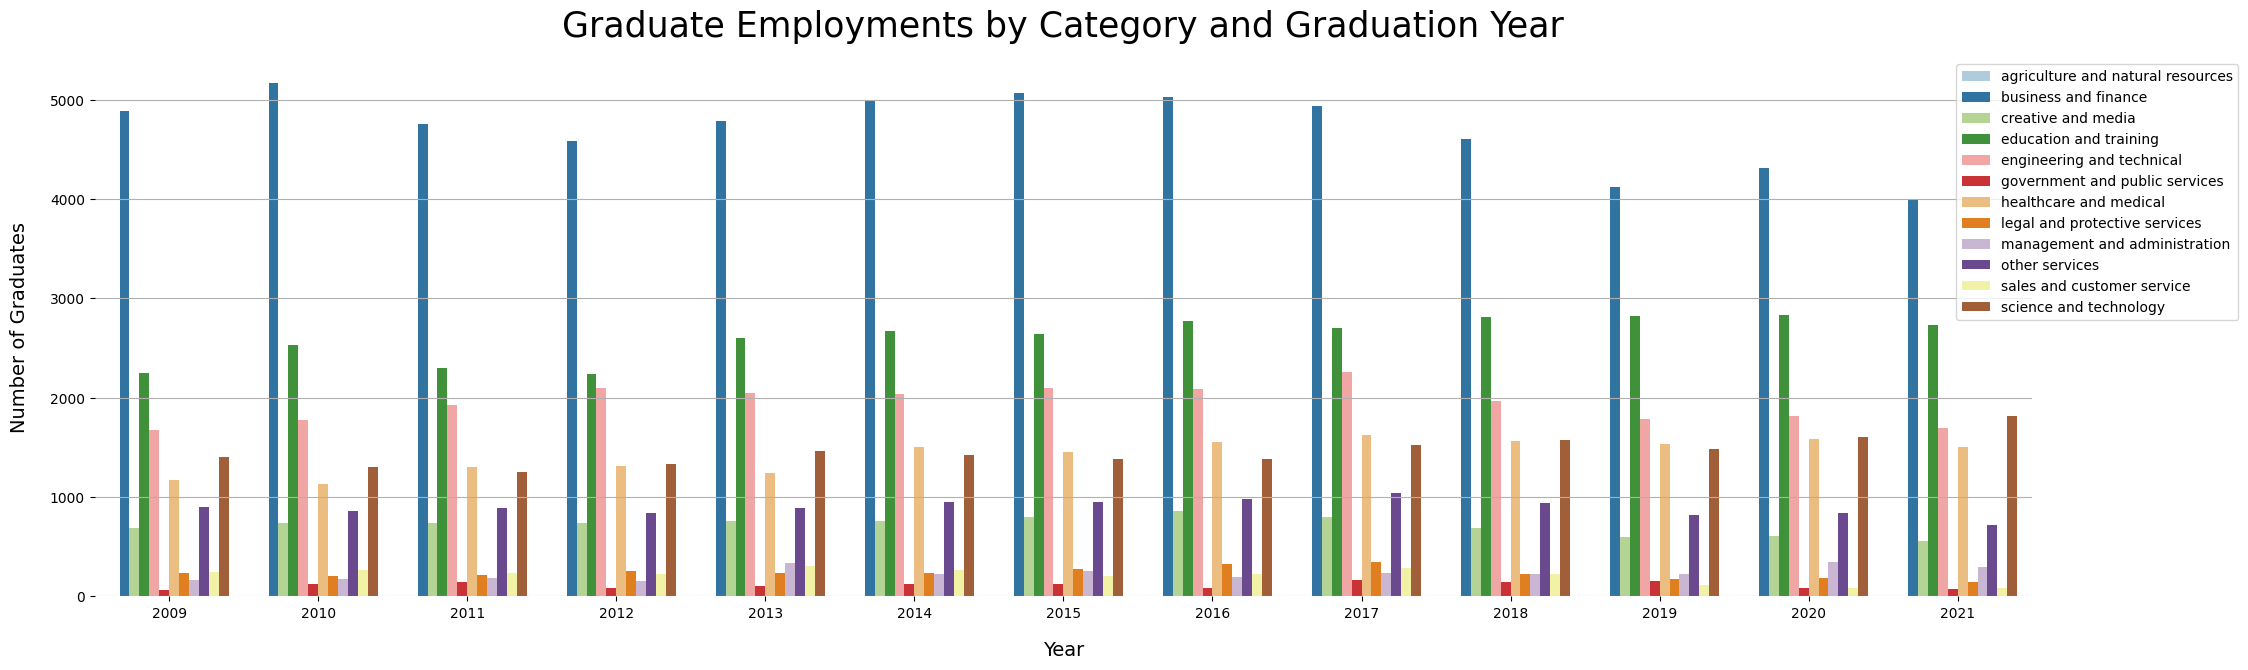

In [53]:
#Plotting a multi-bar chart
fig, ax = plt.subplots(figsize=(25, 7))
sns.barplot(data=grouped_by_category, x='YEAR', y='NUMBER OF GRADUATES', hue='CATEGORY', palette = sns.color_palette('Paired'))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.yaxis.grid(True)

plt.xlabel('Year', labelpad=15, fontsize=14,)
plt.ylabel('Number of Graduates', labelpad=15, fontsize=14)
plt.title('Graduate Employments by Category and Graduation Year', pad=15, fontsize=25)
plt.legend(loc = 'upper right', bbox_to_anchor=(1.11, 1))
plt.show()

### Zooming in to the "agriculture and natural resources" sector

In [54]:
smaller_category = grouped_by_category[grouped_by_category['CATEGORY'] == 'agriculture and natural resources']
smaller_category.head()

,YEAR,CATEGORY,NUMBER OF GRADUATES
0,2009,agriculture and natural resources,4
12,2010,agriculture and natural resources,4
24,2011,agriculture and natural resources,6
36,2012,agriculture and natural resources,1
48,2013,agriculture and natural resources,4


Plotting a bar chart for graduates employment in the agriculture & natural resources sector ONLY

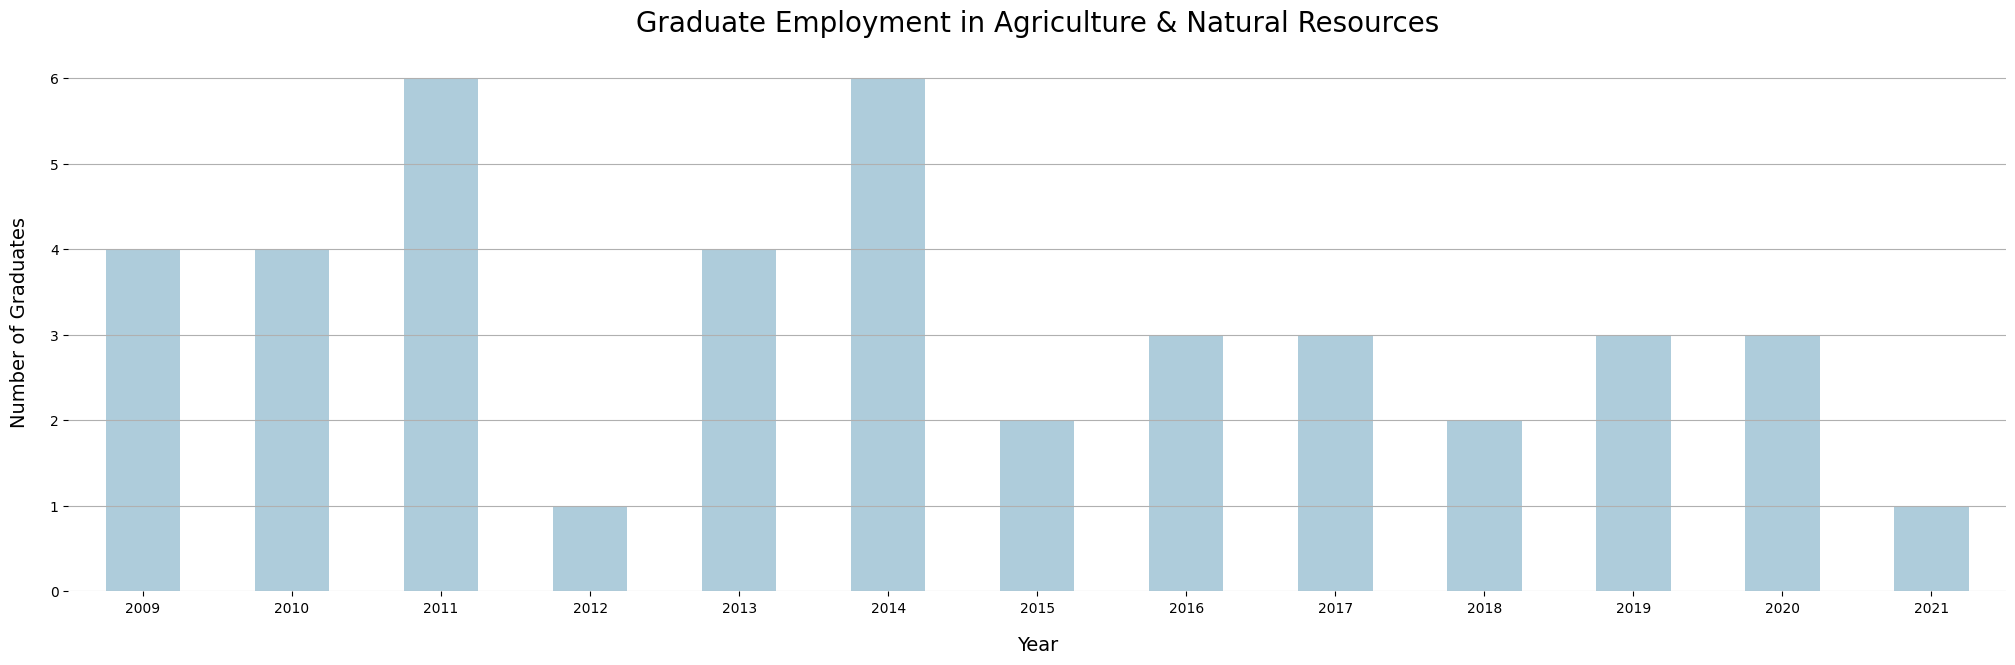

In [55]:
#Plotting a bar chart
fig, ax = plt.subplots(figsize=(25, 7))

sns.barplot(data=smaller_category, x='YEAR', y='NUMBER OF GRADUATES', width=0.5, color=sns.color_palette('Paired')[0])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.yaxis.grid(True)

plt.xlabel('Year', labelpad=15, fontsize=14,)
plt.ylabel('Number of Graduates', labelpad=15, fontsize=14)
plt.title('Graduate Employment in Agriculture & Natural Resources', pad=15, fontsize=20)

plt.show()

### What is the distribution of employment sectors for Hong Kong graduates in 2021/22?

In [56]:
#Grouping the data of 2021/22 by category
latest_year = grouped_by_category[grouped_by_category['YEAR'] == 2021]
latest_year.head()

,YEAR,CATEGORY,NUMBER OF GRADUATES
144,2021,agriculture and natural resources,1
145,2021,business and finance,3993
146,2021,creative and media,554
147,2021,education and training,2733
148,2021,engineering and technical,1692


Plotting a pie chart for academic year 2021/22 by category

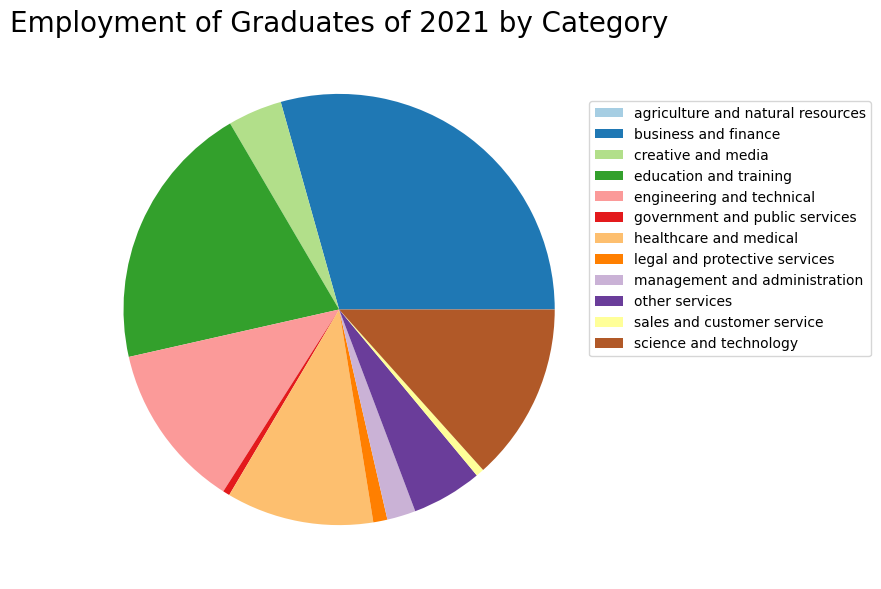

In [57]:
#Plotting a pie chart
fig, ax = plt.subplots(figsize=(25, 7))

plt.pie(latest_year['NUMBER OF GRADUATES'], labels=None, colors=sns.color_palette('Paired'))

plt.title('Employment of Graduates of 2021 by Category', fontsize=20)
plt.legend(latest_year['CATEGORY'], loc = 'upper right', bbox_to_anchor=(1.5, 0.9))
plt.show()

In [69]:
latest_year_table = latest_year.copy()

# Calculating the percentage and assigning it to the 'PERCENTAGE' column
latest_year_table['PERCENTAGE'] = latest_year_table.groupby('YEAR')['NUMBER OF GRADUATES'].transform(lambda x: (x / x.sum()) * 100)
latest_year_table['PERCENTAGE'] = latest_year_table['PERCENTAGE'].round(2)
latest_year_table.drop(columns='NUMBER OF GRADUATES', inplace=True)

print(latest_year_table)


     YEAR                           CATEGORY  PERCENTAGE
144  2021  agriculture and natural resources        0.01
145  2021               business and finance       29.36
146  2021                 creative and media        4.07
147  2021             education and training       20.09
148  2021          engineering and technical       12.44
149  2021     government and public services        0.51
150  2021             healthcare and medical       11.05
151  2021      legal and protective services        1.06
152  2021      management and administration        2.15
153  2021                     other services        5.28
154  2021         sales and customer service        0.62
155  2021             science and technology       13.36
